# LAB 3-Online_shopper_Call backs_cm_Regularization_Optimization

## Objectives of the LAB:
1. Introduce a variety of call backs, plotting, file and history saving, viewing weights of layers and performance metrics.
2. Perform regularization and Batch normalization.
3. Evaluate performace of the models.
4. Compare performance of the models

## 1. Importing Libraries and mounting drive

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
from tensorflow import keras
from keras import utils as np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 2. Loading and Preparing Dataset

In [135]:
train_df = pd.read_csv('https://raw.githubusercontent.com/nopynospy/apu_deep_learning/main/online%20shop_train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/nopynospy/apu_deep_learning/main/online%20shop_test.csv')

In [136]:
train_df.shape

(16626, 13)

In [137]:
test_df.shape

(2466, 13)

In [138]:
# Split dataset to independent (X) and target (y) variables
X_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
X_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]
# One-hot encoding the target variables from the training, validation and test datasets for classification
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=None, dtype="int")
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=None, dtype="int")
# Clearing the nodes left behind in the previous session to free up memory and preventing slowdown.
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# 4. Misc features
## 4.1 Layer Weights

In [139]:
def create_baseline():
    #Initializing Neural Network
    classifier = Sequential()

    ##Defining the architecture of ANN
   
    # First layer 
    classifier.add(Dense(units = 512, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 12))
    
    # Second layer
    classifier.add(Dense(units= 128 , kernel_initializer = 'he_uniform', activation = 'relu'))
    
    classifier.add(Dense(units= 96, kernel_initializer = 'he_uniform', activation = 'relu'))
    # Adding the output layer
    classifier.add(Dense(units = 2, kernel_initializer = 'he_uniform', activation = 'softmax'))
    
   
    # Compiling Neural Network
    ## specifying optimizer 
    ## This is the metaparameter, specfiying the metaparameter , (adam is popular optimizer like SGD, and GD, 
    ## the binary_corssentropy is because it has 2 class)
    
    
    # classifier.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return classifier

model_baseline = create_baseline()
print(model_baseline.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               6656      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 194       
Total params: 84,898
Trainable params: 84,898
Non-trainable params: 0
_________________________________________________________________
None


In [140]:
hidden1 = model_baseline.layers[1]
weights, biases = hidden1.get_weights()
weights

array([[ 0.04067964, -0.00336043,  0.09331302, ...,  0.00245792,
         0.09733552, -0.08533823],
       [ 0.06069423,  0.09338554,  0.09013639, ..., -0.05562919,
        -0.09915592, -0.07003643],
       [-0.03871035,  0.06407639, -0.04704274, ...,  0.08028995,
        -0.03738622,  0.0967179 ],
       ...,
       [-0.09992407,  0.05533648,  0.05717779, ...,  0.03523437,
        -0.00272727, -0.05270342],
       [-0.07520302, -0.04225121, -0.03619627, ..., -0.06922771,
        -0.03622319, -0.00147122],
       [-0.03755522, -0.06533077, -0.0409788 , ...,  0.05789558,
        -0.04246469,  0.01773887]], dtype=float32)

Save the entire model to a HDF5 file.

The '.h5' extension indicates that the model should be saved to HDF5.

(In this case, to not be only limited to Google Colab and drive, I downloaded it)

In [141]:
# model_baseline.save('lab3_baseline.h5')

# from google.colab import files
# files.download('lab3_baseline.h5')

## 4.3 Restoring saved model and history

(Behind the scenes, I uploaded the downloaded h5 file to my GitHub)

In [142]:
!git clone https://github.com/nopynospy/apu_deep_learning.git

fatal: destination path 'apu_deep_learning' already exists and is not an empty directory.


In [143]:
!cd apu_deep_learning/
!ls

apu_deep_learning  lab3_baseline.h5  sample_data


In [144]:
model = keras.models.load_model('lab3_baseline.h5')

# 4.2 Callbacks

## 4.4 Early stopping call back
Setting the early stopping monitor so the model stops training when it won't improve anymore

In [145]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [151]:
early_stopping_monitor = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

history = model.fit(X_train, y_train_cat, validation_split=0.25, epochs = 50,  batch_size = 32, callbacks=[early_stopping_monitor], verbose = 1)

Epoch 1/50
390/390 [==============================] - 1s 2ms/step - loss: 0.3663 - accuracy: 0.8521 - val_loss: 0.5432 - val_accuracy: 0.7784
Epoch 2/50
390/390 [==============================] - 1s 2ms/step - loss: 0.3566 - accuracy: 0.8575 - val_loss: 0.4989 - val_accuracy: 0.8282
Epoch 3/50
390/390 [==============================] - 1s 2ms/step - loss: 0.3453 - accuracy: 0.8597 - val_loss: 0.6425 - val_accuracy: 0.7638
Epoch 4/50
390/390 [==============================] - 1s 2ms/step - loss: 0.3501 - accuracy: 0.8575 - val_loss: 0.4789 - val_accuracy: 0.8237
Epoch 5/50
390/390 [==============================] - 1s 2ms/step - loss: 0.3464 - accuracy: 0.8584 - val_loss: 0.8777 - val_accuracy: 0.6079
Epoch 6/50
390/390 [==============================] - 1s 2ms/step - loss: 0.3420 - accuracy: 0.8557 - val_loss: 0.4359 - val_accuracy: 0.8617
Epoch 7/50
390/390 [==============================] - 1s 2ms/step - loss: 0.3374 - accuracy: 0.8561 - val_loss: 0.5400 - val_accuracy: 0.7953
Epoch 

Early Stopping with patience (it will look next 3 epoch for better result, if not will stop.)

In [152]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    min_delta=0,
    verbose=2,
    mode="auto",
    restore_best_weights=True,
)
history2 = model.fit(X_train, y_train_cat, validation_split=0.25, epochs = 50,  batch_size = 32, callbacks=[early_stopping], verbose = 1)

Epoch 1/50
390/390 [==============================] - 1s 2ms/step - loss: 0.3254 - accuracy: 0.8613 - val_loss: 0.4973 - val_accuracy: 0.8795
Epoch 2/50
390/390 [==============================] - 1s 2ms/step - loss: 0.3231 - accuracy: 0.8601 - val_loss: 0.4380 - val_accuracy: 0.9136
Epoch 3/50
390/390 [==============================] - 1s 2ms/step - loss: 0.3224 - accuracy: 0.8621 - val_loss: 0.5799 - val_accuracy: 0.8376
Epoch 4/50
390/390 [==============================] - 1s 2ms/step - loss: 0.3261 - accuracy: 0.8593 - val_loss: 0.4836 - val_accuracy: 0.8915
Epoch 5/50
390/390 [==============================] - 1s 2ms/step - loss: 0.3230 - accuracy: 0.8596 - val_loss: 0.4947 - val_accuracy: 0.8314
Restoring model weights from the end of the best epoch.
Epoch 00005: early stopping


## 4.5 Plots

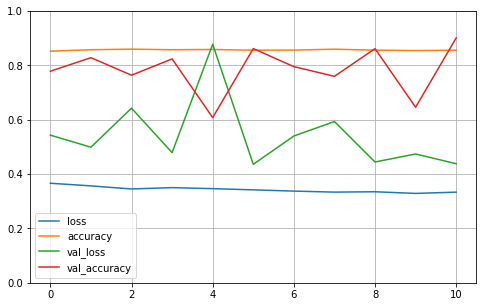

In [156]:
# to plot one of the performance metrics
from matplotlib import pyplot
from PIL import Image

def plot_acc_loss(hist):
  pd.DataFrame(hist.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1)
  plt.show()

plot_acc_loss(history)

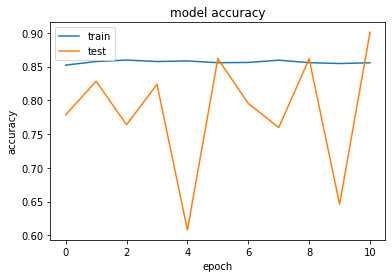

In [158]:
def plot_acc(hist):
  # summarize history for accuracy
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

plot_acc(history)

Train accuracy is quite constant, while test accuracy eventually achieves about 0.9

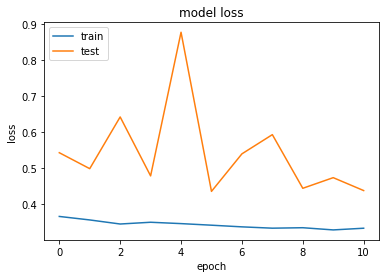

In [159]:
def plot_loss(hist):
  # summarize history for loss
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

plot_loss(history)

Best loss achieved at around 0.45

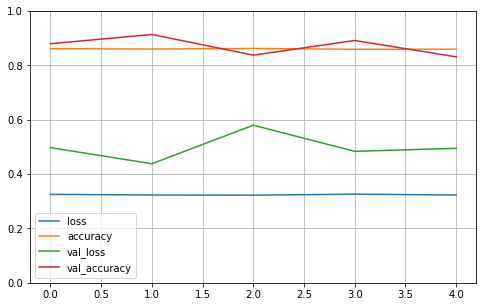

In [160]:
plot_acc_loss(history2)

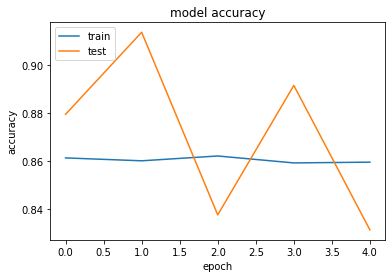

In [161]:
plot_acc(history2)

Test accuracy of more than 0.9 already achieved at first epoch, model looks at the next three (epoch 2 to 4) and decided to stop. From the y-axis, this accuracy is better than previous model

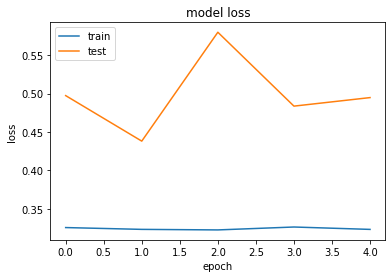

In [162]:
plot_loss(history2)

The loss is better too, based on the y-axis. In previous model, test loss can reach as high as almost 0.9. This loss is more constant